# Dataset Exploration

In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
path = "State_of_Iowa_Salary_Book.csv"

In [3]:
def money_to_float(x):
    try:
        if type(x) == float:
            return x
        return float(x.strip('$'))
    except ValueError:
        return float('nan')

def base_salary_to_float(x):
    try:
        if type(x) == float and math.isnan(x):
            return (None, float('nan'))
        elif type(x) == float:
            return (None, x)
        x = x.strip(" ")
        if x == "":
            return (None, float('nan'))
        elif x == "TERMINATED":
            return ("TERMINATED", float('nan'))
        elif x == "Terminated":
            return ("Terminated", float('nan'))
        elif x == "-0-":
            return ("-0-", float('nan'))
        elif x == "ON LEAVE":
            return ("ON LEAVE", float('nan'))
        elif x == "nan":
            return (None, float('nan'))
        elif x == float("nan"):
            return (None, float('nan'))
        else:
            s = x.replace('/', " ").split(' ')
            if len(s) < 2:
                return (None, float(s[0].strip('$').replace(',', "")))
            return (s[1], float(s[0].strip('$').replace(',', "")))
    except:
        # this is to show rows that failed the parsing
        print("<-"+x+"->", type(x))

In [4]:
# read csv
data = pd.read_csv(path, parse_dates=[0,8], converters={'Total Salary Paid': money_to_float, 'Base Salary': base_salary_to_float, 'Travel & Subsistence': money_to_float})
# split Base Salary tuple into two columns
base_salary_parsed = data["Base Salary"].apply(pd.Series).rename(columns={0:'Base Salary Payment Method', 1:'Base Salary Payment Amount'})
data.insert(8, 'Base Salary Payment Method', base_salary_parsed['Base Salary Payment Method'])
data.insert(9, 'Base Salary Payment Amount', base_salary_parsed['Base Salary Payment Amount'])
# delete Base Salary tuple column
data.pop("Base Salary")

<-HR-> <class 'str'>
<-YR-> <class 'str'>
<-20.12HR-> <class 'str'>
<-262.99DA-> <class 'str'>


0               (HR, 31.62)
1         (TERMINATED, nan)
2              (BW, 2212.8)
3              (BW, 1226.4)
4         (TERMINATED, nan)
5         (TERMINATED, nan)
6         (TERMINATED, nan)
7         (TERMINATED, nan)
8              (BW, 2194.4)
9         (TERMINATED, nan)
10        (TERMINATED, nan)
11        (TERMINATED, nan)
12             (BW, 3375.2)
13        (TERMINATED, nan)
14        (TERMINATED, nan)
15             (BW, 3349.6)
16           (YR, 144200.0)
17             (BW, 1237.6)
18             (BW, 2908.8)
19             (BW, 3193.6)
20        (TERMINATED, nan)
21             (BW, 1598.4)
22        (TERMINATED, nan)
23        (TERMINATED, nan)
24        (TERMINATED, nan)
25        (TERMINATED, nan)
26             (BW, 1180.8)
27             (BW, 3087.2)
28             (BW, 1437.6)
29             (BW, 4792.0)
                ...        
665295          (HR, 23.91)
665296        (HR, 25629.0)
665297          (HR, 22.88)
665298    (TERMINATED, nan)
665299          (HR,

In [5]:
data.dtypes

Fiscal Year                   datetime64[ns]
Department                            object
Agency/Institution                    object
Name                                  object
Gender                                object
Place of Residence                    object
Position                              object
Base Salary Payment Method            object
Base Salary Payment Amount           float64
Base Salary Date              datetime64[ns]
Total Salary Paid                    float64
Travel & Subsistence                 float64
dtype: object

In [6]:
print("Number of unique elements per column")
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].unique()
    print(k, ":", len(c))

Number of unique elements per column
Fiscal Year : 11
Department : 53
Agency/Institution : 37
Gender : 7
Place of Residence : 1426
Position : 5699
Base Salary Payment Method : 16


In [7]:
for k in ["Fiscal Year", "Department", "Agency/Institution", "Gender", "Place of Residence", "Position", "Base Salary Payment Method"]:
    c = data[k].value_counts()
    print(str(k)+":\n"+str(c)+"\n\n")

Fiscal Year:
2007-01-01    67695
2009-01-01    60328
2008-01-01    60262
2015-01-01    60138
2011-01-01    60125
2012-01-01    59929
2014-01-01    59859
2013-01-01    59488
2017-01-01    59400
2010-01-01    59113
2016-01-01    58988
Name: Fiscal Year, dtype: int64


Department:
University of Iowa                                     235607
Iowa State University                                  112766
Human Services, Department of                           65299
Transportation, Department of                           38510
Corrections, Department of                              35940
University of Northern Iowa                             30175
Judicial Branch                                         21971
Natural Resources, Department of                        17388
Public Safety, Department of                            10917
Iowa Veterans Home                                       9950
Iowa Workforce Development                               9891
Education, Department of               

## End of initial data munging

## Start basic visualization

In [8]:
# for 600000 rows this shows a preview of values around 100000 and 500000
data.sort_values(["Total Salary Paid"]).iloc[100000:500000]

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Travel & Subsistence
497448,2015-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2015-07-01,8236.80,0.00
318469,2012-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2012-07-01,8236.80,0.00
494064,2015-01-01,"Human Services, Department of",Human Services Administration,DAVIS KATHIE L,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2015-07-01,8236.80,0.00
376688,2013-01-01,"Human Services, Department of",Human Services Administration,LEWIS JOYCE E,F,WEBSTER,SERIP RETIREE,TERMINATED,NaN,2013-07-01,8236.80,0.00
255056,2011-01-01,"Human Services, Department of",Human Services Administration,DAVIS KATHIE L,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2011-07-01,8236.80,0.00
314459,2012-01-01,"Human Services, Department of",Human Services Administration,CARNAHAN JAMES M,M,SCOTT,SERIP RETIREE,TERMINATED,NaN,2012-07-01,8236.80,0.00
433938,2014-01-01,"Human Services, Department of",Human Services Administration,CARNAHAN JAMES M,M,SCOTT,SERIP RETIREE,TERMINATED,NaN,2014-07-01,8236.80,0.00
437726,2014-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2014-07-01,8236.80,0.00
259675,2011-01-01,"Human Services, Department of",Human Services Administration,WALSH NANCY A,F,NaN,SERIP RETIREE,TERMINATED,NaN,2011-07-01,8236.80,0.00
378207,2013-01-01,"Human Services, Department of",Human Services Administration,SCHAFERSMAN CAROLE S,F,POTTAWATTAMIE,SERIP RETIREE,TERMINATED,NaN,2013-07-01,8236.80,0.00


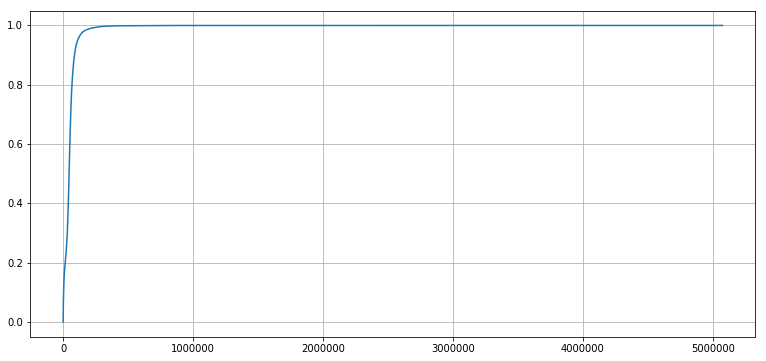

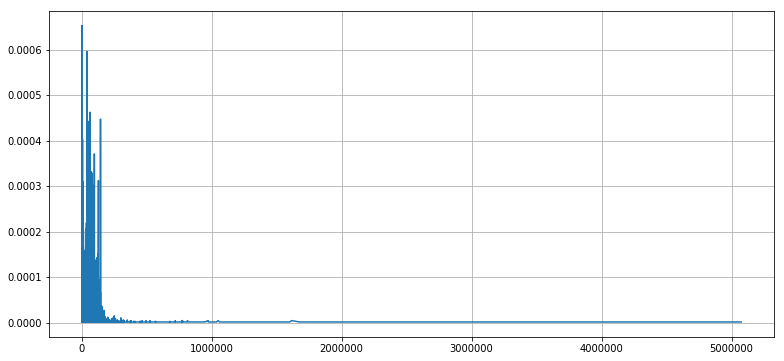

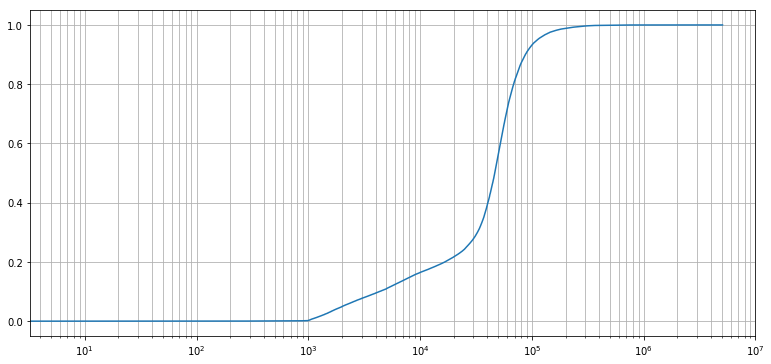

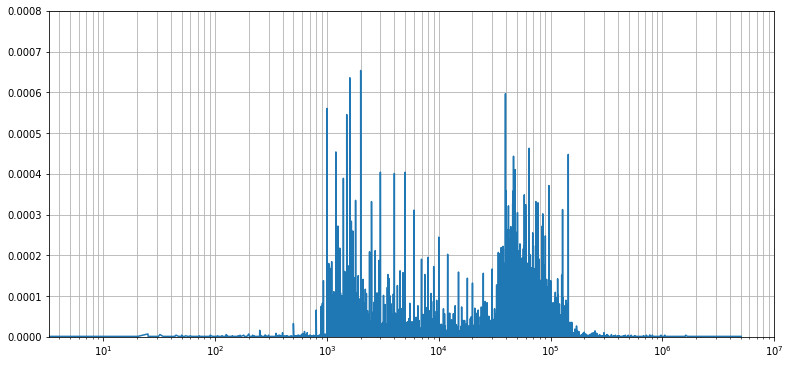

In [9]:
# cdf with linear scale
l = len(data["Total Salary Paid"])
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().iloc[2:]) # the array slicing gets ride of negative salary
# p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).iloc[2:]) # the array slicing gets ride of negative salary
plt.show()

# pdf with linear scale
l = len(data["Total Salary Paid"])
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
# p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().iloc[2:]) # the array slicing gets ride of negative salary
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).iloc[2:]) # the array slicing gets ride of negative salary
plt.show()

# cdf with x-axis log scale
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum().iloc[2:]) # the array slicing gets ride of negative salary
plt.semilogx(True)
plt.show()


# pdf with x-axis log scale
plt.figure(figsize=(13, 6))
plt.grid(True, which="both")
p = plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).iloc[2:]) # the array slicing gets ride of negative salary
plt.semilogx(True)
plt.ylim([0, 0.0008])
plt.show()

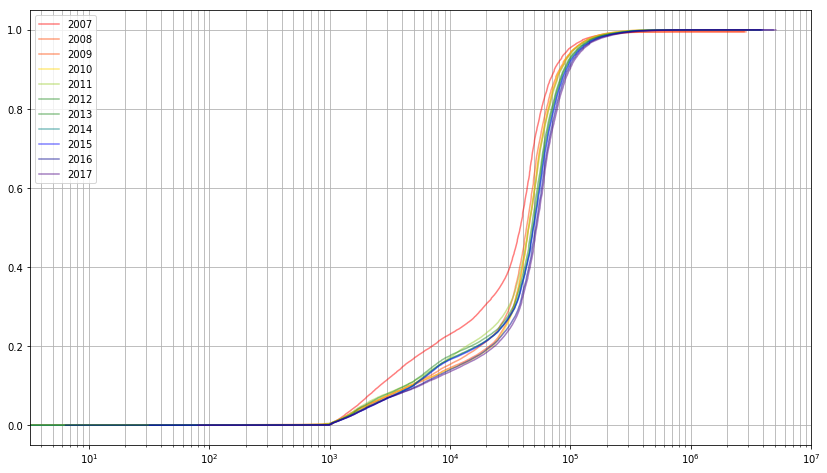

In [10]:
plt.figure(figsize=(14, 8))
plt.grid(True, which="both")
# l = len(data["Total Salary Paid"])  # this plots the full CDF on top of the yearly CDFs
# plt.plot(data["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum(), label="all", color="black", alpha=0.3)
colors = ['#FF0000', '#FF4500', '#FF4500', '#FFD700', '#9ACD32', '#228B22', '#228B22', '#008080', '#0000FF', '#00008B', '#4B0082']
for k, i in enumerate(data.groupby(["Fiscal Year"])):
    title = i[0]
    i = i[1]
    l = len(i["Total Salary Paid"])
    plt.plot(i["Total Salary Paid"].value_counts().sort_index().apply((lambda x: x/l)).cumsum(),
            label=str(title)[:4],
            color=colors[k],
            alpha=0.5)
plt.semilogx(True, basex=10)
plt.legend(loc='best')
plt.show()

In [11]:
g = data.groupby(["Fiscal Year"])

In [12]:
g1mean = data.groupby(["Fiscal Year"])["Total Salary Paid"].mean()
g1median = data.groupby(["Fiscal Year"])["Total Salary Paid"].median()
# print([i for i in g1mean])
# print([i for i in g1median])

# g2 = data.groupby(["Fiscal Year"])["Travel & Subsistence"].mean()
# print([i for i in g2])

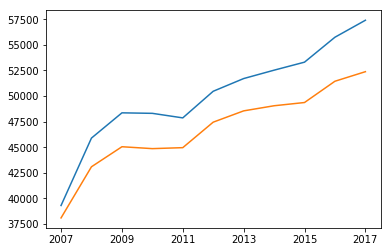

In [13]:
plt.plot(g1mean)
plt.plot(g1median)
plt.show()

In [14]:
# shows the unique payment types
print(data["Base Salary Payment Method"].unique())

# function to estimate hourly wages and hours worked, 
def hourly_estimates(x):
    # dictionary containing conversions of method to number of hours
    method_to_hour_estimate = {'HR': 1, 'BW': 80, 'YR': 2000, 'DA': 8, 'DAILY': 8, 
                               'AN': 2000, 'HRLY': 1, 'BM': 333.33, 'PW': 40}
    # get data from row
    method, amount_per_method, total = x["Base Salary Payment Method"], x["Base Salary Payment Amount"], x["Total Salary Paid"]
    # calc hourly wage and hours worked
    try:
        hourly_wage_estimate = amount_per_method / method_to_hour_estimate.get(method, np.nan) # if the dict does not have a conversion the default is NaN
        hours_worked_estimate = total/hourly_wage_estimate
    except ZeroDivisionError:
        hourly_wage_estimate = np.nan
        hours_worked_estimate = np.nan
    # return tuple
    return hourly_wage_estimate, hours_worked_estimate
# hours_parsed is a dataframe containing all of the hourly estimates
hour_parsed = data[["Base Salary Payment Method", "Base Salary Payment Amount", "Total Salary Paid"]] \
                    .apply(hourly_estimates, axis=1).apply(pd.Series).rename(columns={0:'Hourly Wage Estimate', 1:'Hours Worked Estimate'})  # axis one means that you apply the function on the row instead of the column
# if you were to do x.values it would give you the values of the complete row
data.insert(11, 'Hourly Wage Estimate', hour_parsed['Hourly Wage Estimate'])
data.insert(12, 'Hours Worked Estimate', hour_parsed['Hours Worked Estimate'])

['HR' 'TERMINATED' 'BW' 'YR' 'DA' nan '893.00' 'DAILY' 'AN' 'ON LEAVE'
 '-0-' 'HRLY' 'BM' 'PW' '' 'Terminated']


## Get the list of duplicated names per fiscal year
### should_remove is the duplicated list
### clean_data remove all the duplicated person in should_remove list

In [15]:
def removeOutliersTukey(usefulData, attr):
    thirdQuartile = usefulData.quantile(.75)[attr]
    firstQuartile = usefulData.quantile(.25)[attr]
    IQR = thirdQuartile - firstQuartile
    return usefulData[usefulData[attr].between(firstQuartile - (IQR * 1.5), thirdQuartile + (IQR * 3))]

In [16]:
def checkOutliersTukey(usefulData, attr):
    thirdQuartile = usefulData.quantile(.75)[attr]
    firstQuartile = usefulData.quantile(.25)[attr]
    max_value = usefulData.sort_values(by=attr).iloc[-1][attr]
    min_value = usefulData.sort_values(by=attr).iloc[0][attr]
    
    IQR = thirdQuartile - firstQuartile
    return [usefulData[usefulData[attr].between(thirdQuartile + (IQR * 3), max_value)], \
            usefulData[usefulData[attr].between(min_value, firstQuartile - (IQR * 1.5))]]

In [17]:
print(len(data))
remove_data = removeOutliersTukey(data, 'Total Salary Paid')
print(len(remove_data))

665325
654318


In [18]:
position_data = data[:]
position_data.drop(columns=['Travel & Subsistence', 'Base Salary Payment Amount', 'Hours Worked Estimate', 'Total Salary Paid'])
position_data_filtered_hwe = []

In [19]:
pos_data_filtered_hwe = position_data[position_data['Hourly Wage Estimate'].notnull()]
valid_pos_data = pos_data_filtered_hwe[pos_data_filtered_hwe['Position'].notnull()]
print('Size of original data: ', len(data))
print('Size of data contain valid hourly wage estimate(HWE) info: ', len(pos_data_filtered_hwe))
print('Size of data contain valid HWE and position info: ', len(valid_pos_data))

Size of original data:  665325
Size of data contain valid hourly wage estimate(HWE) info:  255158
Size of data contain valid HWE and position info:  255157


In [20]:
remove_outlier_based_on_hwe = removeOutliersTukey(valid_pos_data,'Hourly Wage Estimate')
print('Size of data contain valid HWE and position info and remove outliers: ', len(remove_outlier_based_on_hwe))

Size of data contain valid HWE and position info and remove outliers:  252328


In [21]:
outlier_based_on_hwe = checkOutliersTukey(valid_pos_data, 'Hourly Wage Estimate')


In [22]:
outlier_based_on_hwe[0].loc[outlier_based_on_hwe[0]['Name'] == 'APPEL BRENT R'].drop(columns=['Travel & Subsistence', 'Agency/Institution', 'Place of Residence'])

,Fiscal Year,Department,Name,Gender,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Hourly Wage Estimate,Hours Worked Estimate
31039,2007-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,146890.0,2007-07-01,76351.58,73.445,1039.574920
92808,2008-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2008-07-01,146830.35,81.600,1799.391544
154112,2009-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2009-07-01,162227.50,81.600,1988.082108
213615,2010-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2010-07-01,159294.75,81.600,1952.141544
273339,2011-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2011-07-01,162909.87,81.600,1996.444485
333338,2012-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2012-07-01,169635.24,81.600,2078.863235
392343,2013-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,163200.0,2013-07-01,163358.32,81.600,2001.940196
511595,2015-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,170544.0,2015-07-01,170543.88,85.272,1999.998593
570137,2016-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,170544.0,2016-07-01,170543.88,85.272,1999.998593
628953,2017-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE,YR,174808.0,2017-07-01,170543.88,87.404,1951.213674


In [23]:
outlier_based_on_hwe[0].drop(columns=['Travel & Subsistence', 'Agency/Institution', 'Place of Residence']).sort_values(by=['Name', 'Fiscal Year'])

,Fiscal Year,Department,Name,Gender,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Hourly Wage Estimate,Hours Worked Estimate
92763,2008-01-01,Judicial Branch,ABEL GORDON C,M,DISTRICT COURT JUDGE,YR,137700.00,2008-07-01,128447.00,68.8500,1865.606391
2157,2007-01-01,"Corrections, Department of",ABRAMS THAD E,M,PHYSICIAN,HR,105.06,2007-07-01,37205.54,105.0600,354.136113
69730,2008-01-01,"Corrections, Department of",ABRAMS THAD E,M,PHYSICIAN,HR,108.21,2008-07-01,19381.55,108.2100,179.110526
92765,2008-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2008-07-01,128474.60,68.8500,1866.007262
154069,2009-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2009-07-01,137024.65,68.8500,1990.190995
213578,2010-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2010-07-01,134391.90,68.8500,1951.952070
273302,2011-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2011-07-01,137459.60,68.8500,1996.508351
333302,2012-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2012-07-01,143194.05,68.8500,2079.797386
392311,2013-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,137700.00,2013-07-01,137957.90,68.8500,2003.745824
511560,2015-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE,YR,143897.00,2015-07-01,143897.00,71.9485,2000.000000


In [24]:
outlier_based_on_hwe[1].drop(columns=['Travel & Subsistence', 'Agency/Institution', 'Place of Residence']).sort_values(by=['Name', 'Fiscal Year'])

,Fiscal Year,Department,Name,Gender,Position,Base Salary Payment Method,Base Salary Payment Amount,Base Salary Date,Total Salary Paid,Hourly Wage Estimate,Hours Worked Estimate
451767,2014-01-01,Judicial Branch,ACKERMAN JOHN D,M,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140689.10,1.948500,7.220380e+04
451768,2014-01-01,Judicial Branch,ACKLEY MONICA L,F,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140560.10,1.948500,7.213759e+04
558957,2016-01-01,"Regents, Board of","ADAIR, REBEKAH",F,SCHOOL ASSISTANT,YR,15.23,2016-07-01,22814.29,0.007615,2.995967e+06
665134,2017-01-01,"Regents, Board of","ADAIR, REBEKAH",F,SCHOOL ASSISTANT,YR,15.57,2017-07-01,24695.89,0.007785,3.172240e+06
451798,2014-01-01,Judicial Branch,ANDREASEN STEVEN J,M,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140560.10,1.948500,7.213759e+04
451804,2014-01-01,Judicial Branch,APPEL BRENT R,M,SUPREME COURT JUSTICE 17,YR,544.00,2014-07-01,166668.76,0.272000,6.127528e+05
398571,2013-01-01,"Regents, Board of","BAKER, GUY",M,GROUNDSKEEPER,YR,20.44,2013-07-01,43292.83,0.010220,4.236089e+06
451845,2014-01-01,Judicial Branch,BARROWS JOEL W,M,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140656.70,1.948500,7.218717e+04
451852,2014-01-01,Judicial Branch,BAUERCAMPER JOHN J,M,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140782.58,1.948500,7.225177e+04
451854,2014-01-01,Judicial Branch,BAUMGARTNER NANCY A,F,DISTRICT COURT JUDGE 14,YR,3897.00,2014-07-01,140639.30,1.948500,7.217824e+04


In [25]:
# preprocess
# 1. if the name appear more than once in the same year, remove those item is whole year duration
sorted_by_name_and_fiscal_year = remove_outlier_based_on_hwe.groupby( [ 'Name', 'Fiscal Year'] )
grped_data = pd.DataFrame(sorted_by_name_and_fiscal_year.size().reset_index(name = 'Count'))
should_remove = {}

for idx, counts in enumerate(grped_data['Count']):
    if counts > 1:
        if grped_data['Name'][idx] not in should_remove:
            should_remove[grped_data['Name'][idx]] = 0

In [26]:
clean_data = remove_outlier_based_on_hwe[:]

# terrible performance
for bad_data in should_remove:
    clean_data = clean_data[clean_data['Name'] != bad_data]

In [80]:
grp_by_n_p = clean_data.groupby(['Name', 'Position'])
dp_grp_n_p = pd.DataFrame(grp_by_n_p.size().reset_index(name = 'Count'))
pos_list = dp_grp_n_p["Name"].value_counts()
pos_not_change_list = pos_list[pos_list == 1].index.tolist()
pos_change_list = pos_list[pos_list > 1].index.tolist()

print(len(data["Name"].value_counts()))
print("number of unique name in original data:" , len(remove_outlier_based_on_hwe["Name"].value_counts()))
print("Removed the data which appear more than once in a fiscal year:" , len(clean_data["Name"].value_counts()))
print("Position value is NaN:", len(clean_data.loc[clean_data["Position"].isnull()]))
print("Position without changes:", len(pos_not_change_list))
print("Position changes:", len(pos_change_list))

175208
number of unique name in original data: 45081
Removed the data which appear more than once in a fiscal year: 43208
Position value is NaN: 0
Position without changes: 33659
Position changes: 9549


## Preprocess Ends

In [28]:
t1 = clean_data['Name'].value_counts()
sum_up = 0
for idx in range(1, 12):
    sum_up += len(t1[t1== idx])
    print(idx, len(t1[t1== idx]))

print(sum_up)

1 9316
2 4776
3 5208
4 2732
5 2115
6 1972
7 2319
8 1729
9 1756
10 2307
11 8978
43208


In [29]:
appear_11_time = t1[t1 == 11]
ap_11_time_list = appear_11_time.index.tolist()
no_pos_changed_11 = [name for name in pos_not_change_list if name in ap_11_time_list]
pos_changed_11 = [name for name in pos_change_list if name in ap_11_time_list]

In [30]:
print(len(no_pos_changed_11))
print(len(pos_changed_11))
print(len(no_pos_changed_11) + len(pos_changed_11) - len(appear_11_time))

5251
3727
0


## Experiments

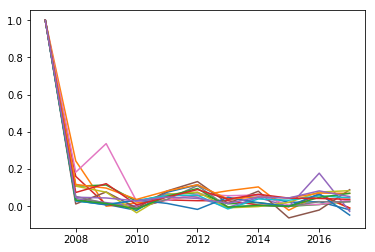

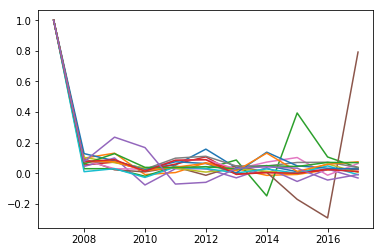

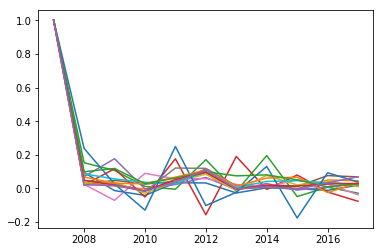

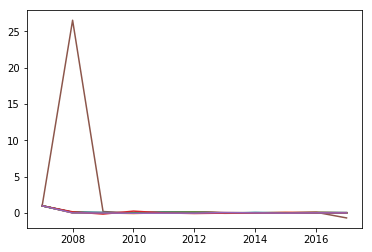

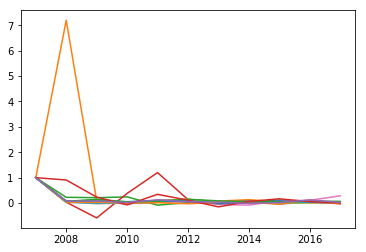

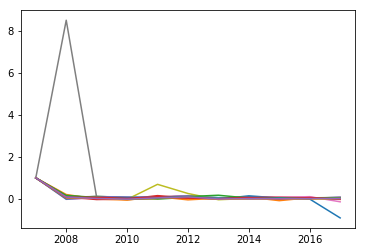

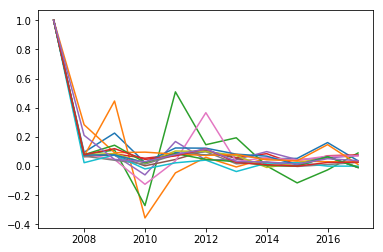

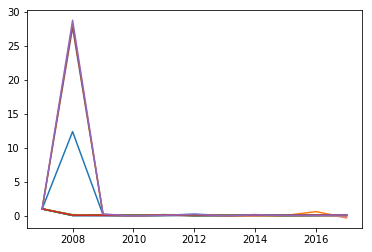

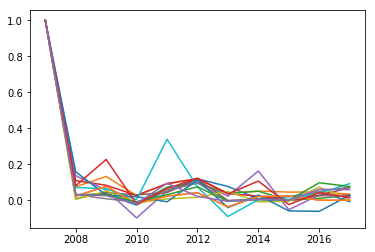

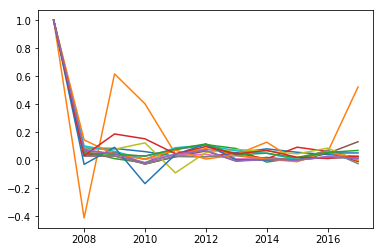

In [31]:
# plot with random picked data
sampled = []
TOTAL_SAMPLE = 150
BATCH_SIZE = 15

for idx in range(TOTAL_SAMPLE):
    tmp = random.choice(pos_changed_11)
    while tmp in sampled:
        tmp = random.choice(pos_changed_11)
    sampled.append(tmp)

for idx in range(TOTAL_SAMPLE):
    val = sampled[idx]
    tmp = clean_data.loc[clean_data['Name']==val]
    years = list(tmp['Fiscal Year'])
    salary = list(tmp['Total Salary Paid'])
    normalized_salary = [1]
    for _idx in range(1,len(salary)):
        normalized_salary.append((salary[_idx]-salary[_idx-1])/salary[_idx-1])

    x = [year.date().year for year in years]

    plt.plot(x, normalized_salary)

    if idx%BATCH_SIZE == BATCH_SIZE - 1:
        plt.show()

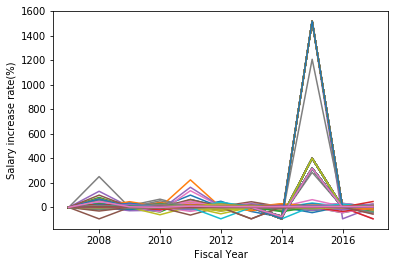

In [32]:
for val in pos_changed_11:
    tmp = clean_data.loc[clean_data['Name']==val]
    years = list(tmp['Fiscal Year'])
    salary = list(tmp['Hourly Wage Estimate'])
    normalized_salary = [0]
    for _idx in range(1,len(salary)):
        normalized_salary.append(((salary[_idx]-salary[_idx-1])/salary[_idx-1])*100)

    x = [year.date().year for year in years]

    plt.plot(x, normalized_salary)
    plt.xlabel('Fiscal Year')
    plt.ylabel('Salary increase rate(%)')

plt.show()

In [33]:
len(pos_changed_11)

3727

5251


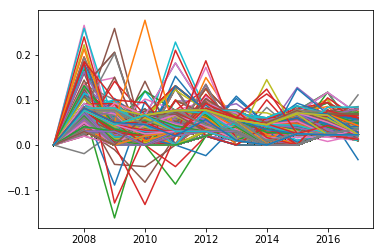

In [34]:
print(len(no_pos_changed_11))
for val in no_pos_changed_11:
    tmp = clean_data.loc[clean_data['Name']==val]
    years = list(tmp['Fiscal Year'])
    salary = list(tmp['Hourly Wage Estimate'])
    normalized_salary = [0]
    for _idx in range(1,len(salary)):
        normalized_salary.append((salary[_idx]-salary[_idx-1])/salary[_idx-1])

    x = [year.date().year for year in years]

    plt.plot(x, normalized_salary)

plt.show()

## Average salary increasing per year

In [35]:
df_no_pos_changed_11 = clean_data.loc[clean_data['Name'].isin(no_pos_changed_11)]
df_pos_changed_11 = clean_data.loc[clean_data['Name'].isin(pos_changed_11)]

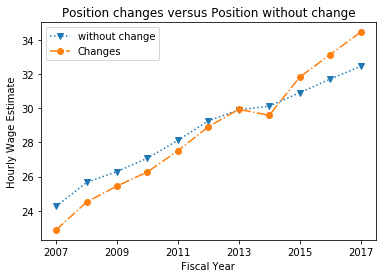

In [36]:
no_pos_changed_mean = df_no_pos_changed_11.groupby(["Fiscal Year"])["Hourly Wage Estimate"].mean()
no_pos_changed_std = df_no_pos_changed_11.groupby(["Fiscal Year"])["Hourly Wage Estimate"].var()
no_pos_changed_median = df_no_pos_changed_11.groupby(["Fiscal Year"])["Hourly Wage Estimate"].median()
pos_changed_mean = df_pos_changed_11.groupby(["Fiscal Year"])["Hourly Wage Estimate"].mean()

pos_changed_median = df_pos_changed_11.groupby(["Fiscal Year"])["Hourly Wage Estimate"].median()

plt.title("Position changes versus Position without change")
plt.plot(no_pos_changed_mean, linestyle=':', label='without change', marker='v')
plt.plot(pos_changed_mean, linestyle='-.', label='Changes', marker='o')
plt.xlabel('Fiscal Year')
plt.ylabel('Hourly Wage Estimate')
plt.legend()
plt.show()

## Wald's Test

In [40]:
years = df_no_pos_changed_11["Fiscal Year"].value_counts().index
years= years[-1::-1]

In [41]:
df_no_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
NO_POS = []

for idx in range(1, len(years)):
    prev_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = prev_yr.reset_index()
    curr_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = curr_yr.reset_index()
    NO_POS.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

In [42]:
df_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
POS = []

for idx in range(1, len(years)):
    prev_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = prev_yr.reset_index()
    curr_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = curr_yr.reset_index()
    POS.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

## Gender

In [43]:
df_no_pos_changed_11_f = df_no_pos_changed_11.loc[df_no_pos_changed_11['Gender'] == 'F']
df_no_pos_changed_11_m = df_no_pos_changed_11.loc[df_no_pos_changed_11['Gender'] == 'M']
df_pos_changed_11_f = df_pos_changed_11.loc[df_pos_changed_11['Gender'] == 'F']
df_pos_changed_11_m = df_pos_changed_11.loc[df_pos_changed_11['Gender'] == 'M']

In [44]:
print(len(df_no_pos_changed_11_f) + len(df_no_pos_changed_11_m))
print(len(df_no_pos_changed_11))
print(len(df_pos_changed_11_f) + len(df_pos_changed_11_m))
print(len(df_pos_changed_11))

57761
57761
40997
40997


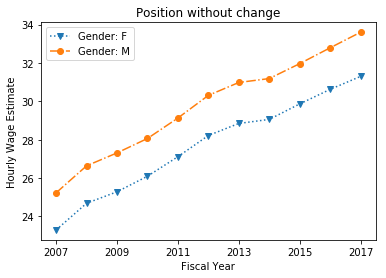

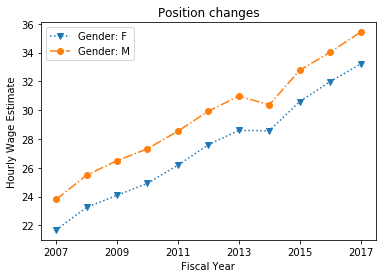

In [45]:
grp_df_no_pos_changed_11_f = df_no_pos_changed_11_f.groupby(["Fiscal Year"])["Hourly Wage Estimate"]
grp_df_no_pos_changed_11_m = df_no_pos_changed_11_m.groupby(["Fiscal Year"])["Hourly Wage Estimate"]

grp_df_pos_changed_11_f = df_pos_changed_11_f.groupby(["Fiscal Year"])["Hourly Wage Estimate"]
grp_df_pos_changed_11_m = df_pos_changed_11_m.groupby(["Fiscal Year"])["Hourly Wage Estimate"]

no_pos_changed_mean_f = grp_df_no_pos_changed_11_f.mean()
no_pos_changed_std_f = grp_df_no_pos_changed_11_f.var()
no_pos_changed_mean_m = grp_df_no_pos_changed_11_m.mean()
no_pos_changed_std_m = grp_df_no_pos_changed_11_m.var()

pos_changed_mean_f = grp_df_pos_changed_11_f.mean()
pos_changed_std_f = grp_df_pos_changed_11_f.var()
pos_changed_mean_m = grp_df_pos_changed_11_m.mean()
pos_changed_std_m = grp_df_pos_changed_11_m.var()

plt.title("Position without change")
plt.plot(no_pos_changed_mean_f, linestyle=':', label='Gender: F', marker='v')
plt.plot(no_pos_changed_mean_m, linestyle='-.', label='Gender: M', marker='o')
plt.xlabel('Fiscal Year')
plt.ylabel('Hourly Wage Estimate')
plt.legend()
plt.show()

plt.title("Position changes")
plt.plot(pos_changed_mean_f, linestyle=':', label='Gender: F', marker='v')
plt.plot(pos_changed_mean_m, linestyle='-.', label='Gender: M', marker='o')
plt.xlabel('Fiscal Year')
plt.ylabel('Hourly Wage Estimate')
plt.legend()
plt.show()

In [46]:
df_no_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
NO_POS_F = []

for idx in range(1, len(years)):
    tmp_prev_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = tmp_prev_yr.loc[tmp_prev_yr['Gender'] == 'F']
    prev_yr = prev_yr.reset_index()

    tmp_curr_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = tmp_curr_yr.loc[tmp_curr_yr['Gender'] == 'F']
    curr_yr = curr_yr.reset_index()
    
    NO_POS_F.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

In [47]:
df_no_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
NO_POS_M = []

for idx in range(1, len(years)):
    tmp_prev_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = tmp_prev_yr.loc[tmp_prev_yr['Gender'] == 'M']
    prev_yr = prev_yr.reset_index()

    tmp_curr_yr = df_no_pos_changed_11.loc[df_no_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = tmp_curr_yr.loc[tmp_curr_yr['Gender'] == 'M']
    curr_yr = curr_yr.reset_index()
    
    NO_POS_M.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

In [48]:
df_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
POS_F = []

for idx in range(1, len(years)):
    tmp_prev_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = tmp_prev_yr.loc[tmp_prev_yr['Gender'] == 'F']
    prev_yr = prev_yr.reset_index()

    tmp_curr_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = tmp_curr_yr.loc[tmp_curr_yr['Gender'] == 'F']
    curr_yr = curr_yr.reset_index()
    
    POS_F.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

In [49]:
df_pos_changed_11.sort_values(by=['Name','Fiscal Year'])
POS_M = []

for idx in range(1, len(years)):
    tmp_prev_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx-1]]
    prev_yr = tmp_prev_yr.loc[tmp_prev_yr['Gender'] == 'M']
    prev_yr = prev_yr.reset_index()

    tmp_curr_yr = df_pos_changed_11.loc[df_pos_changed_11['Fiscal Year'] == years[idx]]
    curr_yr = tmp_curr_yr.loc[tmp_curr_yr['Gender'] == 'M']
    curr_yr = curr_yr.reset_index()
    
    POS_M.append((curr_yr['Hourly Wage Estimate']-prev_yr['Hourly Wage Estimate'])/prev_yr['Hourly Wage Estimate'])

### 2008~2017

In [50]:
def walds_test(x1, x2, title):
    wald = []
    ci_baseline = []
    for idx in range(len(x1)):
        x1_mean = x1[idx].mean()
        x1_var = x1[idx].var()
        x2_mean = x2[idx].mean()
        x2_var = x2[idx].var()
        
        wald.append(np.abs((x1_mean-x2_mean))/np.sqrt(x1_var/len(x1[idx]) + x2_var/len(x2[idx])))
        ci_baseline.append(1.96)
    
    year = 2008
    print(x1_mean, x1_var, x2_mean, x2_var)
#     [print(year+idx, val) for idx, val in enumerate(wald)]
    msg = title
    plt.title(msg)
    plt.plot(wald, linestyle=':', label='hypothesis test', marker='v')
    plt.plot(ci_baseline, linestyle='-.', label='95% CI', marker='o')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Z score')
    plt.legend()
    plt.show()
    
def walds_test_get_score(x1, x2):
    x1_mean = np.nanmean(x1)
    x1_var = np.nanvar(x1, dtype=np.float64)
    x2_mean = np.nanmean(x2)
    x2_var = np.nanvar(x2,dtype=np.float64)
    print(x1_mean, x1_var, x2_mean, x2_var)
    
    return (x1_mean-x2_mean)/np.sqrt(x1_var/len(x1) + x2_var/len(x2))

In [51]:
def remove_outlier(data):
    tmp_data = data.sort_values(ascending=True)
    q1_val, q3_val = data.quantile([.25, .75])
    iqr = q3_val-q1_val
    upper_bound = q3_val + 1.5 * iqr
    lower_bound = q1_val - 1.5 * iqr
    ret = pd.Series([val for val in tmp_data if val >= lower_bound and val <= upper_bound])
    
    return ret

## Remove outliers

In [52]:
nop_without_outlier = []
pos_without_outlier = []

for idx in range(len(NO_POS)):
    nop_without_outlier.append(remove_outlier(NO_POS[idx]))

for idx in range(len(POS)):
    pos_without_outlier.append(remove_outlier(POS[idx]))

In [53]:
nop_wo_outlier_f = []
nop_wo_outlier_m = []
pos_wo_outlier_f = []
pos_wo_outlier_m = []

for idx in range(len(NO_POS_F)):
    nop_wo_outlier_f.append(remove_outlier(NO_POS_F[idx]))

for idx in range(len(NO_POS_M)):
    nop_wo_outlier_m.append(remove_outlier(NO_POS_M[idx]))

for idx in range(len(POS_F)):
    pos_wo_outlier_f.append(remove_outlier(POS_F[idx]))

for idx in range(len(POS_M)):
    pos_wo_outlier_m.append(remove_outlier(POS_M[idx]))

## Wald's test (removing outliers)

## 2008~2017

0.07600560875334512 0.13056578404207578 0.1247881952489513 0.2661818288453844


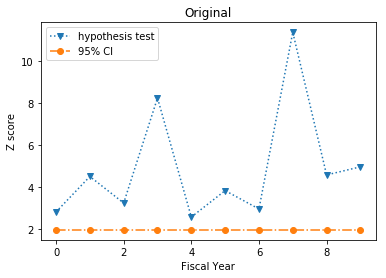

0.07914648730024704 0.141713403738789 0.06625692744709548 0.09945820302426935


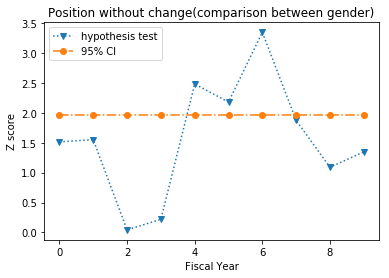

0.1172889580715544 0.2094996079206991 0.12528774121544875 0.4504990011593296


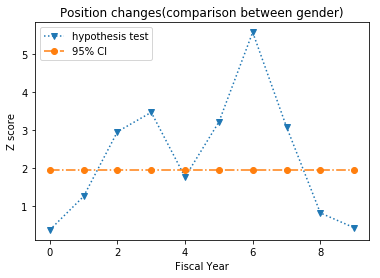

In [54]:
# print("Original")
walds_test(NO_POS, POS, "Original")

# print("\n Remove outliers")
# walds_test(nop_without_outlier, pos_without_outlier, "Remove outliers")

# print("\n Position did not change(comparison between gender)")
walds_test(NO_POS_F, NO_POS_M, "Position without change(comparison between gender)")

# print("\n Position changed(comparison between gender)")
walds_test(POS_F, POS_M, "Position changes(comparison between gender)")

# print("\n Position did not change with removing outliers(comparison between gender)")
# walds_test(nop_wo_outlier_f, nop_wo_outlier_m, "Position without change - removing outliers(comparison between gender)")

# print("\n Position changed with removing outliers(comparison between gender)")
# walds_test(pos_wo_outlier_f, pos_wo_outlier_m, "Position changes - removing outliers(comparison between gender)")

In [55]:
flatten_no_pos = [y for x in NO_POS for y in x]
flatten_pos = [y for x in POS for y in x]
flatten_no_pos_f = [y for x in NO_POS_F for y in x]
flatten_no_pos_m = [y for x in NO_POS_M for y in x]
flatten_pos_f = [y for x in POS_F for y in x]
flatten_pos_m = [y for x in POS_M for y in x]

In [56]:
print('wald\'s test on original case - average year: ', walds_test_get_score(flatten_pos, flatten_no_pos))
print("")
print('wald\'s test on position without change  - average year: ', walds_test_get_score(flatten_no_pos_f, flatten_no_pos_m))
print("")
print('wald\'s test on position change  - average year: ', walds_test_get_score(flatten_pos_f, flatten_pos_m))


# walds_test(flatten_no_pos, flatten_pos, "")

0.11221073296031787 0.35403695405377905 0.060488581314143725 0.07432356143452949
wald's test on original case - average year:  15.655660052625382

0.0626251475863884 0.08067018946271473 0.05492740013965091 0.060382212861558725
wald's test on position without change  - average year:  3.3235931724383247

0.10552309108596664 0.3321562061025417 0.1093588878190886 0.48436415630741697
wald's test on position change  - average year:  -0.5818103380527594


In [57]:
def permutation_test(x1, x2):
    ITER = 10000
    X = np.nanmean(x1)
    Y = np.nanmean(x2)
    len_x = len(x1)
    data = x1 + x2

    Tobs = np.abs(X - Y)
    print(Tobs)
    count = 0

    for _ in range(ITER):
        data = np.random.permutation(data)
        X = np.mean(data[:len_x])
        Y = np.mean(data[len_x:])

        if np.abs(X - Y) > Tobs:
            count += 1
    print(count, ITER)
    print("p-value is ", count / ITER)


In [58]:
permutation_test(flatten_no_pos, flatten_pos)

0.05172215164617415
0 10000
p-value is  0.0


In [59]:
len(flatten_pos_f)
# len(flatten_no_pos_m)

16370

In [60]:
permutation_test(flatten_pos_f, flatten_pos_m)

0.0038357967331219683
5701 10000
p-value is  0.5701


In [61]:
# series_flatten_no_pos = pd.Series(flatten_no_pos)
# series_flatten_pos = pd.Series(flatten_pos)
# series_flatten_no_pos_f = pd.Series(flatten_no_pos_f)
# series_flatten_no_pos_m = pd.Series(flatten_no_pos_m)
# series_flatten_pos_f = pd.Series(flatten_pos_f)
# series_flatten_pos_m = pd.Series(flatten_pos_m)

# no_outlier_flatten_no_pos = remove_outlier(series_flatten_no_pos)
# no_outlier_flatten_pos = remove_outlier(series_flatten_pos)
# no_outlier_flatten_no_pos_f = remove_outlier(series_flatten_no_pos_f)
# no_outlier_flatten_no_pos_m = remove_outlier(series_flatten_no_pos_m)
# no_outlier_flatten_pos_f = remove_outlier(series_flatten_pos_f)
# no_outlier_flatten_pos_m = remove_outlier(series_flatten_pos_m)
# print('wald\'s test with outliers removed - average year: ', walds_test_get_score(no_outlier_flatten_no_pos, no_outlier_flatten_pos))
# print('wald\'s test with outliers removed - average year: ', walds_test_get_score(no_outlier_flatten_no_pos_f, no_outlier_flatten_no_pos_m))
# print('wald\'s test with outliers removed - average year: ', walds_test_get_score(no_outlier_flatten_pos_f, no_outlier_flatten_pos_m))


In [62]:
flatten_no_pos

[0.02989427633977398,
 0.060560560560560604,
 0.029945170814002414,
 0.07628676470588241,
 0.02985074626865684,
 0.030093145450203133,
 0.07698541329011353,
 0.05266457680250783,
 0.05068836045056312,
 0.030093145450203133,
 0.07631578947368414,
 0.0764671013633671,
 0.07639231148348945,
 0.02991045913507349,
 0.029956427015250583,
 0.029810298102980998,
 0.030093145450203133,
 0.07607282184655396,
 0.03014915899714374,
 0.02997799779978007,
 0.04319248826291071,
 0.030093145450203133,
 0.07649333906317152,
 0.029810298102980998,
 0.029945170814002414,
 0.030093145450203133,
 0.03621659634317866,
 0.16834677419354838,
 0.07647983237297018,
 0.07609346914319949,
 0.07641633728590246,
 0.030093145450203133,
 0.07644110275689234,
 0.07643514113542647,
 0.07630906768837806,
 0.030093145450203133,
 0.07631578947368414,
 0.0759717314487632,
 0.030093145450203133,
 0.05409153952843282,
 0.07658707047175314,
 0.07632398753894094,
 0.07642064010450697,
 0.029810298102980998,
 0.0300931454502031

In [63]:
a = np.nanmean(flatten_no_pos_f)
a_v = np.nanvar(flatten_no_pos_f)
b = np.nanmean(flatten_no_pos_m)
b_v = np.nanvar(flatten_no_pos_m)

(a - b)/np.sqrt(a_v/len(flatten_no_pos_f) + b_v/len(flatten_no_pos_m))

3.3235931724383247

In [64]:
len(flatten_no_pos_f)
len(flatten_pos)

37270

## Department change

In [65]:
df_pos_changed_in_department_11 = df_pos_changed_11.replace(to_replace='Administrative Services, Department of ', value='Administrative Services, Department of')
df_no_pos_changed_in_department_11 = df_no_pos_changed_11.replace(to_replace='Administrative Services, Department of ', value='Administrative Services, Department of')

In [66]:
dpcid11 = df_pos_changed_in_department_11.groupby(['Department'])
dpcid11 = pd.DataFrame(dpcid11.size().reset_index(name = 'Count'))

dnpcid11 = df_no_pos_changed_in_department_11.groupby(['Department'])
dnpcid11 = pd.DataFrame(dnpcid11.size().reset_index(name = 'Count'))

In [67]:
type(df_pos_changed_in_department_11)

pandas.core.frame.DataFrame

In [68]:
department_dictionary = {}

for department in dnpcid11['Department'].tolist():
    if department not in department_dictionary:
        department_dictionary[department] = 0

for department in dpcid11['Department'].tolist():
    if department not in department_dictionary:
        department_dictionary[department] = 0
        
for idx, key in enumerate(department_dictionary):
    department_dictionary[key] = idx

In [69]:
bins = list(range(len(department_dictionary)))

In [70]:
x = []
y = []

for idx, key in enumerate(dpcid11['Department']):
    val = department_dictionary[dpcid11['Department'].iloc[idx]]
    count = dpcid11['Count'].iloc[idx]
    x += dpcid11['Count'].iloc[idx] * [val]
    

for idx, key in enumerate(dnpcid11['Department']):
    val = department_dictionary[dnpcid11['Department'].iloc[idx]]
    
    y += dnpcid11['Count'].iloc[idx] * [val]

In [71]:
dnpcid11_normalized = []
dpcid11_normalized = []


for idx, key in enumerate(department_dictionary):
    val_no_pos = dnpcid11.loc[dnpcid11['Department'] == key]['Count'].reset_index()
    v1 = 0
    val_pos = dpcid11.loc[dpcid11['Department'] == key]['Count'].reset_index()
    v2 = 0
    if val_no_pos.empty:
        v1 = 0
    else:
        v1 = val_no_pos.iloc[0].tolist()
        v1 = v1[1]

    if val_pos.empty:
        v2 = 0
    else:
        v2 = val_pos.iloc[0].tolist()
        v2 = v2[1]   

    n1 = int(100 * v1/(v1 + v2))
    n2 = int(100 * v2/(v1 + v2))

        
    dnpcid11_normalized += [idx] * n1
    dpcid11_normalized += [idx] * n2
    


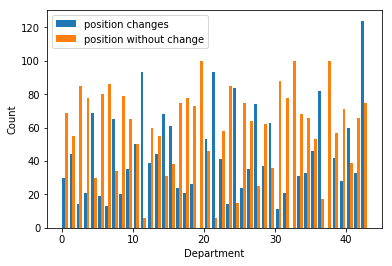

In [72]:
plt.hist([dpcid11_normalized, dnpcid11_normalized], bins, label=['position changes','position without change'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend()
plt.show()

In [73]:
dnpcid11.loc[dnpcid11['Department'] == 'Drug Control Policy, Office of']

,Department,Count
10,"Drug Control Policy, Office of",11


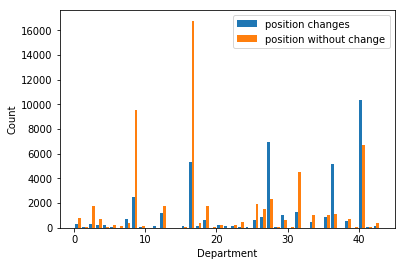

In [74]:
plt.hist([x, y], bins, label=['position changes','position without change'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend()
plt.show()

In [75]:
dnpcid11['Department'][dnpcid11['Count'] == max(dnpcid11['Count'])], \
dpcid11['Department'][dpcid11['Count'] == max(dpcid11['Count'])]

(16    Human Services, Department of
 Name: Department, dtype: object, 38    Transportation, Department of
 Name: Department, dtype: object)

In [76]:
dnpcid11['Count'][dnpcid11['Department'] == 'Human Services, Department of'], \
dpcid11['Count'][dpcid11['Department'] == 'Human Services, Department of']

(16    16765
 Name: Count, dtype: int64, 17    5300
 Name: Count, dtype: int64)

In [77]:
dnpcid11['Count'][dnpcid11['Department'] == 'Transportation, Department of'], \
dpcid11['Count'][dpcid11['Department'] == 'Transportation, Department of']

(40    6743
 Name: Count, dtype: int64, 38    10307
 Name: Count, dtype: int64)

In [78]:
[print("%d %s"%(idx, depart)) for idx, depart in enumerate(department_dictionary)]

0 Administrative Services, Department of
1 Aging, Department on
2 Agriculture & Land Stewardship, Department of
3 Attorney General, Office of
4 Auditor of State, Office of
5 Blind, Department for the
6 Chief Information Officer, Office of
7 Commerce, Department of
8 Corrections, Department of
9 Cultural Affairs, Department of
10 Drug Control Policy, Office of
11 Economic Development, Department of
12 Education, Department of
13 Elder Affairs, Department of
14 Homeland Security & Emergency Management Department
15 Human Rights, Department of
16 Human Services, Department of
17 IPERS
18 Inspections & Appeals, Department of
19 Iowa Civil Rights Commission
20 Iowa Communications Network
21 Iowa Economic Development Authority
22 Iowa Finance Authority
23 Iowa Lottery Authority
24 Iowa Student College Aid Commission
25 Iowa Veterans Home
26 Iowa Workforce Development
27 Judicial Branch
28 Law Enforcement Academy
29 Legislative Branch
30 Management, Department of
31 Natural Resources, Departm

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [79]:
department_dictionary[]

SyntaxError: invalid syntax (<ipython-input-79-0a52db24b9ab>, line 1)

In [ ]:
df_no_pos_changed_11_in_transport = df_no_pos_changed_11.loc[df_no_pos_changed_11['Department'] == 'Transportation, Department of']
df_pos_changed_11_in_transport = df_pos_changed_11.loc[df_pos_changed_11['Department'] == 'Transportation, Department of']

In [ ]:
len(df_no_pos_changed_11_in_transport), len(df_pos_changed_11_in_transport)

In [ ]:
df_pos_changed_11_in_transport.groupby(['Name'])

In [ ]:
df_pos_changed_11_in_transport

## Histogram (Position without changes)

In [ ]:
sampled = []
TOTAL_SAMPLE = 150
BATCH_SIZE = 15

for idx in range(1000):
    tmp = random.choice(pos_not_change_list)

    while tmp in sampled:
        tmp = random.choice(pos_not_change_list)
    sampled.append(tmp)

for idx in range(TOTAL_SAMPLE):
    val = sampled[idx]
    tmp = remove_no_position_data.loc[remove_no_position_data['Name']==val]
    years = list(tmp['Fiscal Year'])
    salary = list(tmp['Total Salary Paid'])
    normalized_salary = [1]
    for _idx in range(1,len(salary)):
        normalized_salary.append((salary[_idx]-salary[_idx-1])/salary[_idx-1])

    x = [year.date().year for year in years]

    plt.plot(x, normalized_salary)

    if idx%BATCH_SIZE == BATCH_SIZE - 1:
        plt.show()    
# for val in sampled:
#     tmp = remove_no_position_data.loc[remove_no_position_data['Name']==val]
#     years = list(tmp['Fiscal Year'])
#     salary = list(tmp['Total Salary Paid'])
#     normalized_salary = [1]

#     for idx in range(1,len(salary)):
#         normalized_salary.append((salary[idx]-salary[idx-1])/salary[idx-1])

#     x = [year.date().year for year in years]
#     plt.plot(x, normalized_salary)

# plt.show()